<a href="https://colab.research.google.com/github/pranavrao87/Machine-Learning/blob/main/Convolutional%20Neural%20Networks/03_multiclass_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class Image Classification
# New Section
1. Preprocess Data
2. Create model (start w/ a baseline)
3. Fit model (overfit to make sure it works)
4. Evaluate model
5. Adjust diff hyperparameters and improve model (try to beat baseline/reduce overfitting)


### 1. Import and preprocess data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-08-07 23:34:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.202.128, 74.125.69.128, 64.233.182.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.5’

10_food_classes_all 100%[===================>] 495.13M  74.3MB/s    in 5.6s    

2023-08-07 23:34:50 (88.7 MB/s) - ‘10_food_classes_all_data.zip.5’ saved [519183241/519183241]



In [2]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.

In [3]:
# Setup train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [4]:
# Getting class names (subdirectories)
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted(item.name for item in data_dir.glob('*')))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [5]:
from re import A
# Visualize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory
  target_folder = target_dir + target_class

  # Get rand image path
  random_image = random.sample(os.listdir(target_folder), 1) # randomly sample 1 of the items from here
  print(random_image)
  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show shape of image

  return img

['2509017.jpg']
Image shape: (512, 512, 3)


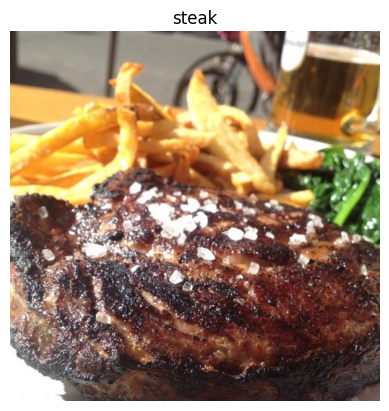

In [6]:
# Visualizing directories
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocessing Data

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale images
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start w/ baseline)

Replicating CNN explainer model TinyVGG architecture
https://poloclub.github.io/cnn-explainer/

In [8]:
import tensorflow as tf

In [9]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [26]:
model_8 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile model
model_8.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

### 4. Fit model

In [11]:
history_8 = model_8.fit(train_data, #now 10 diff classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 33s 125ms/step - loss: 2.1238 - accuracy: 0.2293 - val_loss: 1.9717 - val_accuracy: 0.2976
Epoch 2/5
235/235 [==============================] - 30s 129ms/step - loss: 1.9110 - accuracy: 0.3411 - val_loss: 1.8577 - val_accuracy: 0.3536
Epoch 3/5
235/235 [==============================] - 30s 129ms/step - loss: 1.6163 - accuracy: 0.4456 - val_loss: 1.9286 - val_accuracy: 0.3352
Epoch 4/5
235/235 [==============================] - 30s 127ms/step - loss: 1.0720 - accuracy: 0.6447 - val_loss: 2.2126 - val_accuracy: 0.3108
Epoch 5/5
235/235 [==============================] - 33s 140ms/step - loss: 0.4483 - accuracy: 0.8633 - val_loss: 3.3351 - val_accuracy: 0.2820


### 5. Evaluate model

In [12]:
# Evaluate on test data
model_8.evaluate(test_data)

79/79 [==============================] - 7s 89ms/step - loss: 3.3351 - accuracy: 0.2820


[3.335078239440918, 0.28200000524520874]

In [13]:
# Plot validation and training curves seperately
def plot_loss_curves(history):
  """
  Returns seperte loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs were ran

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

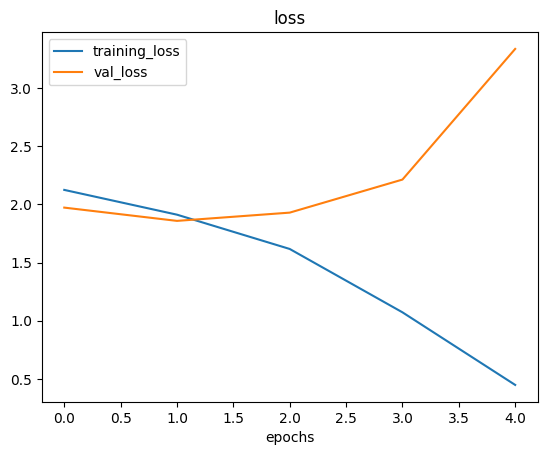

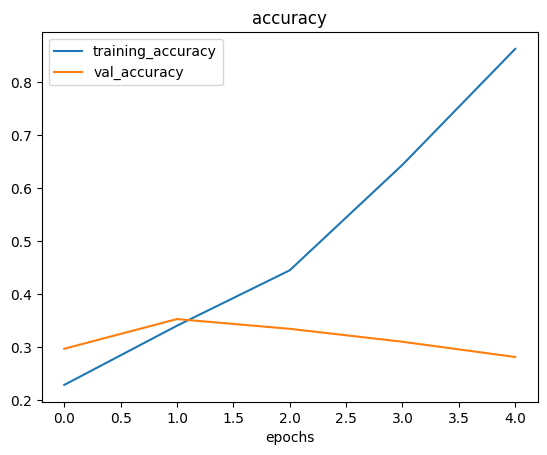

In [14]:
# Check model's loss curves on 10 classes
plot_loss_curves(history_8)

Curves ideally should be similar, but as you can see the validation loss is much worse than the training loss. Signifies that the model is **OVERFITTING** on the training data. In other words, it can fit well on training data, but fails to generalize on unseen data and performs poorly on test dataset.



### 6. Adjust model hyperparameters (to beat baseline/reduce overfitting)

Some ways to reduce overfitting (again):
- add data augmentation - manipulates training data such that it adds diversity to it w/o altering original data
- add more data - gives model more opportunities to learn diverse patterns
- simplify the model - if current model is overfitting the data, it may be too complicated of a model
  - ex. reduce # of layers or reduce # of hidden units in layers
- Use transfer learning - transfer learning leverages patterns another model has already learned on similar data and allowes you to use those patterns on your own dataset

In [15]:
# Try to simplify model - removing 2 Conv2D layers
model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_9.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


In [17]:
# Fit model w/ 2 Conv layers removed
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 32s 138ms/step - loss: 1.0863 - accuracy: 0.6504 - val_loss: 2.2759 - val_accuracy: 0.2900
Epoch 2/5
235/235 [==============================] - 33s 142ms/step - loss: 0.6856 - accuracy: 0.7919 - val_loss: 2.7052 - val_accuracy: 0.2688
Epoch 3/5
235/235 [==============================] - 29s 125ms/step - loss: 0.3471 - accuracy: 0.9063 - val_loss: 3.1842 - val_accuracy: 0.2732
Epoch 4/5
235/235 [==============================] - 32s 135ms/step - loss: 0.1705 - accuracy: 0.9637 - val_loss: 3.8665 - val_accuracy: 0.2520
Epoch 5/5
235/235 [==============================] - 27s 116ms/step - loss: 0.0764 - accuracy: 0.9884 - val_loss: 4.3252 - val_accuracy: 0.2640


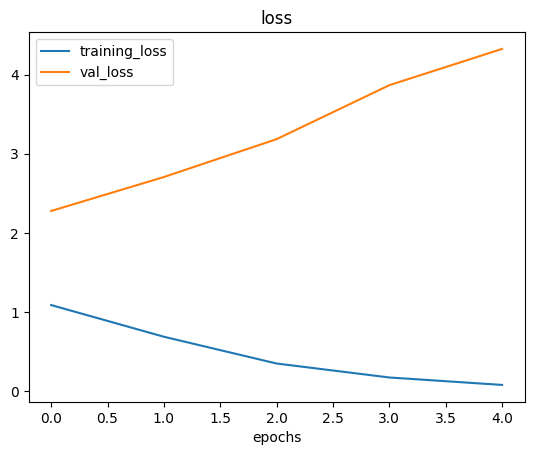

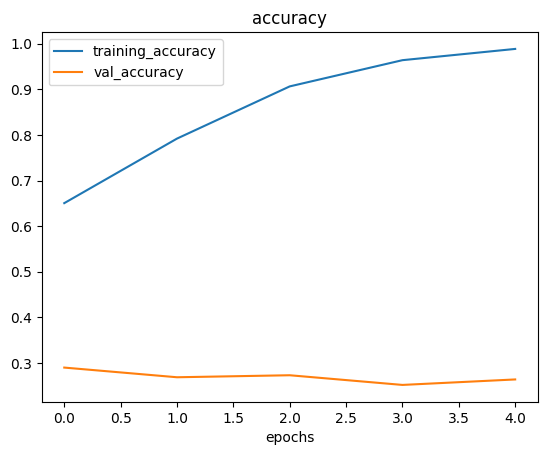

In [18]:
# Check loss curves
plot_loss_curves(history_9)

In [19]:
model_9.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [20]:
model_8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, None, None, 10)    280       
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, None, None, 10)   0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 conv2d_3 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                    

models have similar number of parameters and therefore there isn't much change.

### 6. Data augmentation

Trying to reduce model's results by using augmented training data

Ideally:
- Reduce overfitting (get train and validation loss curves closer)
- Improve validation accuracy

In [21]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [27]:
# Create new model, but fit it on the augmented data now
model_10 = tf.keras.models.clone_model(model_8)

clone model only just clones the architecture, but resets internally learned patterns


In [28]:
# Compile (cloned) model
model_10.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])


In [31]:
# Fit model
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 113s 470ms/step - loss: 2.1553 - accuracy: 0.2163 - val_loss: 2.0000 - val_accuracy: 0.2996
Epoch 2/5
235/235 [==============================] - 102s 432ms/step - loss: 2.0392 - accuracy: 0.2819 - val_loss: 1.8823 - val_accuracy: 0.3428
Epoch 3/5
235/235 [==============================] - 102s 435ms/step - loss: 1.9755 - accuracy: 0.3156 - val_loss: 1.8575 - val_accuracy: 0.3524
Epoch 4/5
235/235 [==============================] - 100s 425ms/step - loss: 1.9267 - accuracy: 0.3389 - val_loss: 1.7721 - val_accuracy: 0.3980
Epoch 5/5
235/235 [==============================] - 103s 439ms/step - loss: 1.9044 - accuracy: 0.3440 - val_loss: 1.7748 - val_accuracy: 0.3944


In [32]:
model_8.evaluate(test_data)

79/79 [==============================] - 11s 127ms/step - loss: 2.2996 - accuracy: 0.1052


[2.2995593547821045, 0.10520000010728836]

In [33]:
model_10.evaluate(test_data)

79/79 [==============================] - 9s 109ms/step - loss: 1.7748 - accuracy: 0.3944


[1.7748334407806396, 0.3944000005722046]

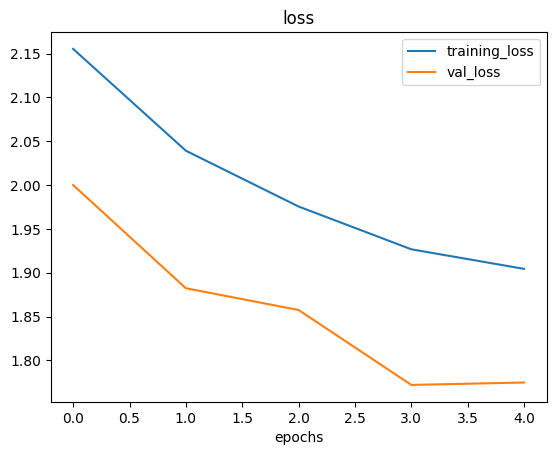

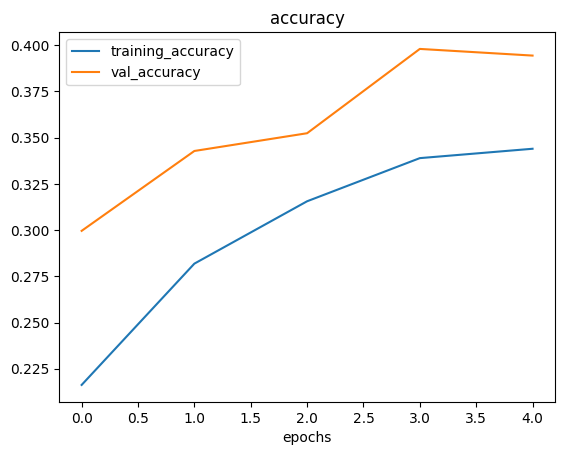

In [34]:
# Check model trained on augmented data's loss curves
plot_loss_curves(history_10)

Big improvement from baseline model and look like they are heading in the right direction. Potentially training for longer might lead to further improvements

### 7. Repeat

- Longer training (10 epochs instead of 5)
- Change architecture of model
- lr optimization
- diff methods of data augmentation (adjust hyperparameters of data loaders, train_datagen_augmented)
- transfer learning

### Making a prediction w/ trained model

In [35]:
# Class names
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [36]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg


--2023-08-08 00:46:29--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2023-08-08 00:46:29 (40.7 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

--2023-08-08 00:46:29--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting

In [39]:
# Create a function to import an image and resize it to be used w/ model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into tensor and reshapes it
  to (img_shape, img_shape, coulor channels).
  """

  # Read an image
  img = tf.io.read_file(filename)

  # Decode read file into a tensor
  img = tf.image.decode_image(img)

  # Resize image
  img = tf.image.resize(img, size=[img_shape, img_shape])

  # Rescale and Normalize Data
  img = img/255.

  return img

In [47]:
# Reconfigure pred_and_plot function to work w/ multiclass images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports and image located at filename, makes a prediction with model
  and plots the image w/ the predicted class as the title
  """

  # Import target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class and get predicted class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]


  # Plot image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 54ms/step


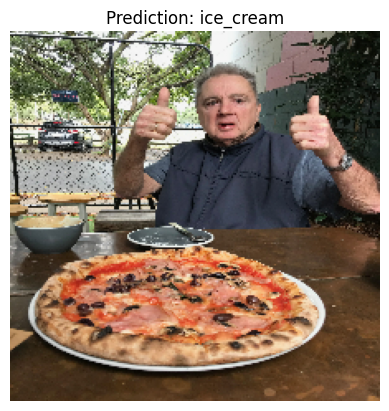

In [49]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
              filename="03-pizza-dad.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 30ms/step


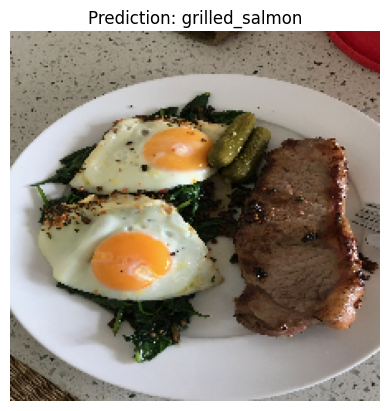

In [50]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
              filename="03-steak.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 20ms/step


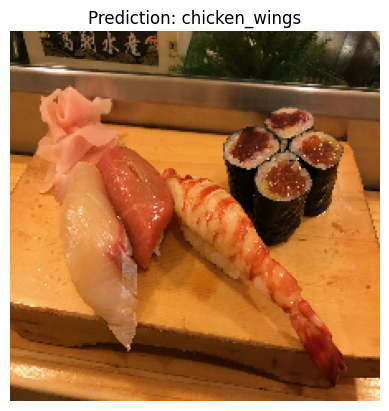

In [51]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
              filename="03-sushi.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 50ms/step


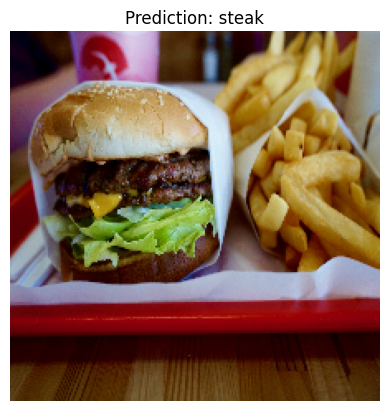

In [52]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
              filename="03-hamburger.jpeg",
              class_names=class_names)

Model didn't perform well b/c it only achieved 39% accuracy on test data so it'll function poorly on unseen data

## Saving and loading models

In [54]:
# Save a model
model_10.save("saved_trained_model_10")

In [55]:
# Load in a trained model and evaluate
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 9s 104ms/step - loss: 1.7748 - accuracy: 0.3944


[1.7748335599899292, 0.3944000005722046]

In [56]:
# Compare loaded model to existing model
model_10.evaluate(test_data)

79/79 [==============================] - 9s 110ms/step - loss: 1.7748 - accuracy: 0.3944


[1.7748332023620605, 0.3944000005722046]